Input song name
Enrich with dancability, etc...
Get country it will be popular in
Predict next popularity? (advanced: how long will it be popular for?)

In [11]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Load the datasets
song_properties_data = pd.read_parquet('https://github.com/rhoai-mlops/jukebox/raw/refs/heads/main/1-data_prep/song_properties.parquet')
song_properties_data.head()

,spotify_id,snapshot_date,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,2024-08-26,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,0.30800,0.000000,0.122,0.535,157.969,3
1,6dOtVTDdiauQNBQEDOtlAB,2024-08-26,100,False,210373,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.117,0.438,104.978,4
2,7tI8dRuH2Yc6RuoTjxo4dU,2024-08-26,94,False,170887,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.000000,0.193,0.838,116.034,4
3,5N3hjp1WNayUPZrA8kJmJP,2024-08-26,97,True,186365,0.669,0.586,9,-6.073,1,0.0540,0.27400,0.000000,0.104,0.579,107.071,4
4,2qSkIjg1o9h3YT9RAgYN75,2024-08-26,98,True,175459,0.701,0.760,0,-5.478,1,0.0285,0.10700,0.000065,0.185,0.690,103.969,4


In [23]:
song_rankings_data = pd.read_parquet('https://github.com/rhoai-mlops/jukebox/raw/refs/heads/main/1-data_prep/song_rankings.parquet')
song_rankings_data.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,album_name,album_release_date
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,6,None,2024-08-26,Die With A Smile,2024-08-16
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,-1,0,None,2024-08-26,HIT ME HARD AND SOFT,2024-05-17
2,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,3,2,-2,None,2024-08-26,MUSE,2024-07-19
3,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,4,-1,0,None,2024-08-26,Please Please Please,2024-06-06
4,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,5,-1,-2,None,2024-08-26,Espresso,2024-04-12


In [38]:
# Merge the datasets
data = pd.merge(song_properties_data.drop("snapshot_date", axis=1), song_rankings_data, on='spotify_id')
data.head()

,spotify_id,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,time_signature,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,album_name,album_release_date
0,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,6,None,2024-08-26,Die With A Smile,2024-08-16
1,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",35,15,15,ZA,2024-08-26,Die With A Smile,2024-08-16
2,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",5,0,10,VN,2024-08-26,Die With A Smile,2024-08-16
3,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",29,-5,21,VE,2024-08-26,Die With A Smile,2024-08-16
4,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",3,1,4,US,2024-08-26,Die With A Smile,2024-08-16


In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,1132003.0,75.818675,13.735692,0.000000,66.0000,79.000000,87.000000,100.000
duration_ms,1132003.0,192555.534370,50293.507790,0.000000,160507.0000,185000.000000,217142.000000,939666.000
danceability,1132003.0,0.684884,0.138791,0.000000,0.5940,0.703000,0.790000,0.988
energy,1132003.0,0.652575,0.162441,0.001890,0.5520,0.671000,0.764000,0.998
key,1132003.0,5.521315,3.567152,0.000000,2.0000,6.000000,9.000000,11.000
loudness,1132003.0,-6.421843,2.582947,-37.334000,-7.7580,-5.961000,-4.707000,2.605
mode,1132003.0,0.539961,0.498401,0.000000,0.0000,1.000000,1.000000,1.000
speechiness,1132003.0,0.095249,0.089756,0.000000,0.0400,0.058700,0.111000,0.921
acousticness,1132003.0,0.271132,0.249511,0.000008,0.0670,0.183000,0.434000,0.996
instrumentalness,1132003.0,0.017943,0.094745,0.000000,0.0000,0.000001,0.000079,0.974


In [40]:
data = data.dropna()
data.head()

,spotify_id,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,time_signature,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,album_name,album_release_date
1,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",35,15,15,ZA,2024-08-26,Die With A Smile,2024-08-16
2,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",5,0,10,VN,2024-08-26,Die With A Smile,2024-08-16
3,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",29,-5,21,VE,2024-08-26,Die With A Smile,2024-08-16
4,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",3,1,4,US,2024-08-26,Die With A Smile,2024-08-16
5,2plbrEY59IikOBgBGLjaoe,91,False,251667,0.521,0.592,6,-7.777,0,0.0304,...,3,Die With A Smile,"Lady Gaga, Bruno Mars",5,0,14,TW,2024-08-26,Die With A Smile,2024-08-16


In [41]:
data['country'].unique()

array(['ZA', 'VN', 'VE', 'US', 'TW', 'TH', 'SV', 'SK', 'SG', 'SE', 'SA',
       'RO', 'PT', 'PL', 'PH', 'PE', 'PA', 'NZ', 'NO', 'NL', 'NI', 'MY',
       'MX', 'LV', 'LU', 'LT', 'KR', 'IS', 'IL', 'IE', 'ID', 'HN', 'HK',
       'GT', 'GB', 'FR', 'FI', 'EE', 'EC', 'DK', 'DE', 'CR', 'CO', 'CL',
       'CH', 'CA', 'BR', 'BO', 'BG', 'BE', 'AU', 'AT', 'AE', 'DO', 'PY',
       'KZ', 'IT', 'HU', 'GR', 'CZ', 'UA', 'MA', 'PK', 'ES', 'JP', 'BY',
       'AR', 'IN', 'EG', 'UY', 'NG', 'TR'], dtype=object)

In [42]:
mapping = {c:i for i, c in enumerate(data['country'].unique())}
mapping

{'ZA': 0,
 'VN': 1,
 'VE': 2,
 'US': 3,
 'TW': 4,
 'TH': 5,
 'SV': 6,
 'SK': 7,
 'SG': 8,
 'SE': 9,
 'SA': 10,
 'RO': 11,
 'PT': 12,
 'PL': 13,
 'PH': 14,
 'PE': 15,
 'PA': 16,
 'NZ': 17,
 'NO': 18,
 'NL': 19,
 'NI': 20,
 'MY': 21,
 'MX': 22,
 'LV': 23,
 'LU': 24,
 'LT': 25,
 'KR': 26,
 'IS': 27,
 'IL': 28,
 'IE': 29,
 'ID': 30,
 'HN': 31,
 'HK': 32,
 'GT': 33,
 'GB': 34,
 'FR': 35,
 'FI': 36,
 'EE': 37,
 'EC': 38,
 'DK': 39,
 'DE': 40,
 'CR': 41,
 'CO': 42,
 'CL': 43,
 'CH': 44,
 'CA': 45,
 'BR': 46,
 'BO': 47,
 'BG': 48,
 'BE': 49,
 'AU': 50,
 'AT': 51,
 'AE': 52,
 'DO': 53,
 'PY': 54,
 'KZ': 55,
 'IT': 56,
 'HU': 57,
 'GR': 58,
 'CZ': 59,
 'UA': 60,
 'MA': 61,
 'PK': 62,
 'ES': 63,
 'JP': 64,
 'BY': 65,
 'AR': 66,
 'IN': 67,
 'EG': 68,
 'UY': 69,
 'NG': 70,
 'TR': 71}

In [43]:
pd.set_option('future.no_silent_downcasting', True)
data["country"] = data['country'].replace(
   mapping
).astype(int)

In [45]:
corr_data = data.drop(["spotify_id", "name", "artists", "snapshot_date", "album_name", "album_release_date"], axis=1)

In [46]:
corr = corr_data.corr()['country'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,country
country,1.000000
energy,0.090213
speechiness,0.080219
valence,0.075788
loudness,0.060249
time_signature,0.044814
danceability,0.043911
liveness,0.032143
is_explicit,0.001557
daily_rank,0.000380


In [47]:
corr = corr_data.corr()['popularity'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,popularity
popularity,1.000000
loudness,0.145805
mode,0.134013
is_explicit,0.105550
key,0.020406
energy,0.016819
duration_ms,0.010024
tempo,-0.000838
valence,-0.011855
instrumentalness,-0.013130


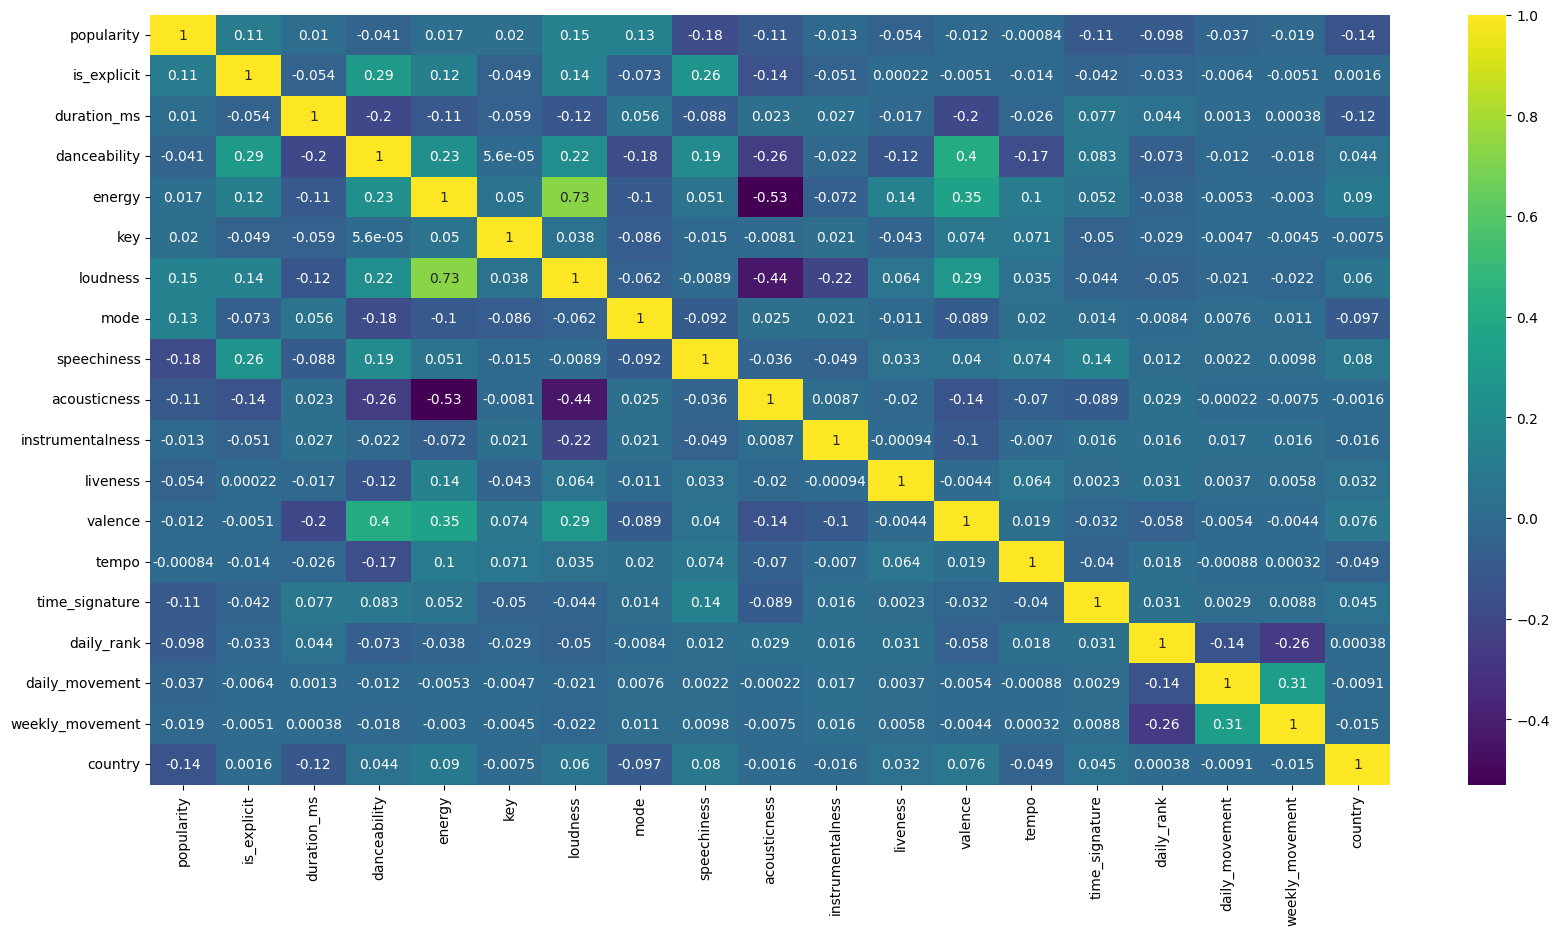

In [48]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr_data.corr(), annot = True, cmap='viridis')
plt.show()

In [49]:
corr_data.groupby('country').mean().reset_index()

,country,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,daily_rank,daily_movement,weekly_movement
0,0,69.667794,0.233240,300106.195851,0.731387,0.599643,5.315300,-8.986506,0.539827,0.082225,0.133000,0.081096,0.134228,0.498192,120.494381,3.931725,25.503544,1.312699,2.898108
1,1,66.537357,0.122325,213870.125977,0.684114,0.535249,5.501089,-8.416738,0.680892,0.078380,0.485135,0.012934,0.167241,0.490179,122.707679,3.924773,25.489940,0.490452,1.749968
2,2,80.577920,0.558781,193603.132730,0.756956,0.688805,5.567374,-5.361927,0.428004,0.114089,0.263177,0.009098,0.168765,0.561615,115.285219,3.967647,25.492839,1.114308,2.971814
3,3,87.345098,0.473938,198013.192772,0.639153,0.601095,5.522017,-7.061342,0.691826,0.082745,0.265384,0.013750,0.164277,0.476583,127.528062,3.857721,25.491095,1.072868,4.182660
4,4,73.384917,0.105399,202373.706003,0.639981,0.621086,5.655235,-6.383557,0.743195,0.060925,0.303096,0.000873,0.160686,0.502487,124.344836,3.930249,25.487356,0.415739,1.524355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,73.882521,0.020904,216287.344295,0.633975,0.588440,5.147760,-7.241362,0.635647,0.069935,0.471987,0.006407,0.150201,0.523506,106.859854,3.932795,25.494790,0.690414,1.988474
68,68,59.001089,0.074114,218804.413811,0.710298,0.702262,4.900327,-5.730791,0.270322,0.084181,0.349308,0.006783,0.187893,0.638342,117.574742,4.000064,25.493754,0.416181,1.505413
69,69,74.782820,0.282691,176445.941566,0.724081,0.687874,6.100117,-5.098515,0.528243,0.082840,0.231684,0.003936,0.180269,0.676176,113.530166,3.927931,25.490391,0.483638,1.697896
70,70,65.827520,0.317429,170543.849700,0.746552,0.694614,5.446902,-7.113947,0.523954,0.133754,0.286015,0.019712,0.158859,0.629856,114.714666,4.048230,25.495777,0.661809,2.175704


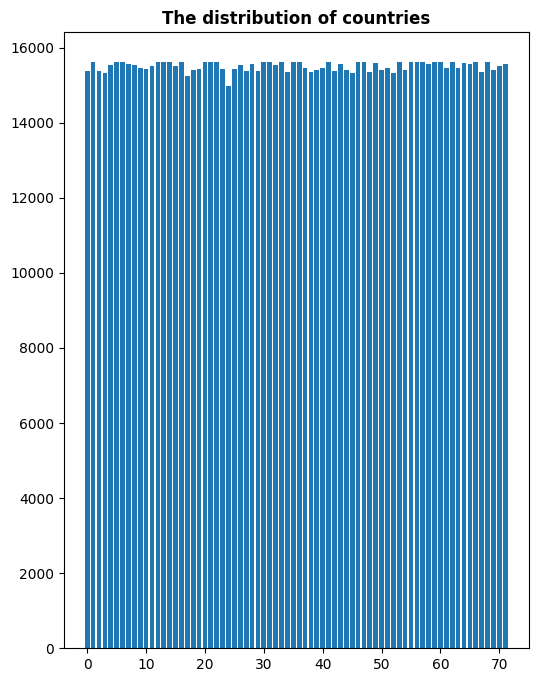

In [50]:
plt.figure(figsize = (6, 8))
plt.bar(x = data['country'].value_counts().index,
        height = data['country'].value_counts().values)
plt.title('The distribution of countries', size = 12, weight = 'bold')
plt.show()

In [51]:
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'])

start_date = pd.Timestamp(2023, 11, 1)
end_date = pd.Timestamp(2024, 1, 15)
filtered_data = data[(data['snapshot_date'] >= start_date) & (data['snapshot_date'] < end_date)]

# Group by song and calculate the mean popularity for each song
popularity_per_song = filtered_data.groupby('name')['popularity'].mean()

# Sort the songs by popularity in descending order and select the top 10
top_10_songs = popularity_per_song.nlargest(10).reset_index()['name']

print("Top 10 Popular Songs from 1st January 2024 to 15th March 2024:")
print(top_10_songs)

Top 10 Popular Songs from 1st January 2024 to 15th March 2024:
0           All I Want for Christmas Is You
1         Rockin' Around The Christmas Tree
2                             Santa Tell Me
3    Let It Snow! Let It Snow! Let It Snow!
4                                 yes, and?
5                                   Snowman
6                          Jingle Bell Rock
7                                 As It Was
8                                Classy 101
9                              Cruel Summer
Name: name, dtype: object
